In [1]:
from preprocess import preprocess
from LDA import LDA_model
import pandas as pd
import numpy as np
import os
import pyLDAvis

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ouren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processi

### Setup Models

In [ ]:
model_a = LDA_model(path_base = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/',
                    folder = 'Papers1',
                    model_type = 'ensemble',
                    model_name = '8_11_ensA3_syn3')


model_b = LDA_model(path_base = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/',
                    folder = 'Papers2',
                    model_type = 'ensemble',
                    model_name = '8_11_ensB3_syn3')


model_a.model_package()
model_b.model_package()

In [ ]:
model_full = LDA_model(path_base = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/',
                    folder = 'Papers',
                    model_type = 'ensemble',
                    model_name = '8_11_ensFull_syn3')

model_full.model_package()

In [ ]:

model_a.compare_scores(model_a,model_b)
diff_df = model_a.diff_df

In [ ]:
df = model_full.LDAvis_prepared.topic_info.iloc[0:99]
df['norm_score'] = df.saliency / df.saliency.sum()

In [ ]:
model_a.compare_df(model_a = model_a, model_b = model_b, full_model_df = df)

In [ ]:
validation_df = pd.DataFrame(columns = ['Term','saliency','difference','difference_percent']) 
set = [validation_df,model_a.compare_df]
validation_df = pd.concat(set) 

In [ ]:
saliency = {'Term':[],'saliency':[],'difference':[]}
df_a = model_a.LDAvis_prepared.topic_info.iloc[0:99]
df_b = model_b.LDAvis_prepared.topic_info.iloc[0:99]

df_a.norm_score = df_a.saliency / df_a.saliency.sum()
df_b.norm_score = df_b.saliency / df_b.saliency.sum()

for Term in diff_df.Term:
    if df.Term.eq(Term).any():
        # score_1 = df_a.norm_score[df_a.Term == Term].item()
        # score_2 = df_b.norm_score[df_b.Term == Term].item()
        score = df.norm_score[df.Term == Term].item()
        difference = diff_df.difference[diff_df.Term == Term].item()
        #print(score)
        saliency['saliency'].append(score)
        saliency['Term'].append(Term)
        saliency['difference'].append(difference)
        
sal_df = pd.DataFrame(saliency)
sal_df['difference_percent'] = (sal_df.difference / sal_df.saliency).astype(float)
sal_df.difference = sal_df.difference.astype(float)

In [ ]:
key = ['long_term_cost','short_term_cost','policy_incentives','suitability_compatibility','familiarity_knowledge','norms_attitudes',
    'brand_image','sustainability','reliability_uncertainty','driver_acceptance']

In [ ]:
sal_df = sal_df[sal_df['Term'].isin(key)]

In [ ]:
sal_df.to_excel('saliency_syns3_aug1.xlsx')
sal_df.to_csv('saliency_syns3_aug1.csv')

In [ ]:
sal_df.difference_percent.plot.hist()

In [ ]:
sal_df.boxplot(column=['difference_percent'])

In [ ]:
diff_df.to_csv('diff_scores_original.csv')

Score Totals are currently the sum of lda weights across top 4 topics notmalized so all scores add to 1 for each model

In [ ]:
coherence_a = model_a.score_totals
coherence_b = model_b.score_totals

# print('total a coherence',coherence_a.score.sum())
# print('total b coherence',coherence_b.score.sum())

In [ ]:
coherence_a.iloc[40] == 'suitability'

In [ ]:
len(model_a.files.lemmatized)

## Validation

In [6]:
def validation(num_iterations):
        validation_df = pd.DataFrame(columns = ['Term','saliency','difference','difference_percent'])   
        
        model_a = LDA_model(path_base = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/',
                folder = 'Papers1',
                model_type = 'ensemble',
                model_name = '8_11_ensA3_syn3')


        model_b = LDA_model(path_base = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/',
                folder = 'Papers2',
                model_type = 'ensemble',
                model_name = '8_11_ensB3_syn3')
        
        model_full = LDA_model(path_base = 'C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/',
                    folder = 'Papers',
                    model_type = 'ensemble',
                    model_name = '8_11_ensFull_syn3')
        
        model_a.build_corpus()
        model_b.build_corpus()
        model_full.build_corpus()
        k = 1
        for i in range(num_iterations):
                # Create validation and full models
                model_a.make_pyvis(save=False)
                model_b.make_pyvis(save=False)
                model_full.make_pyvis(save=False)
                df = model_full.LDAvis_prepared.topic_info.iloc[0:99]
                df['norm_score'] = df.saliency / df.saliency.sum()

                # compare validation models
                model_a.compare_scores(model_1=model_a,model_2=model_b)

                # compare scores creates a dataframe object that contains all of the
                # words the two validation corpora have in common and the difference
                # in their saliency

                model_a.compare_df(model_a = model_a,model_b=model_b, full_model_df = df)

                set = [validation_df,model_a.compare_saliency_df]

                validation_df = pd.concat(set)

                print('{} iteration(s) complete'.format(k))
                k+=1
        return validation_df

In [7]:
validation_df = validation(100)

No Funky Fleet Found
No Funky Fleet Found
No Funky Fleet Found
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

0 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

1 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

2 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

3 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

4 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

5 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

6 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

7 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

8 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

9 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

10 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

11 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

12 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

13 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

14 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

15 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

16 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

17 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

18 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

19 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

20 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

21 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

22 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

23 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

24 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

25 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

26 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

27 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

28 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

29 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

30 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

31 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

32 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

33 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

34 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

35 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

36 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

37 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

38 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

39 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

40 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

41 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

42 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

43 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

44 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

45 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

46 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

47 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

48 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

49 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

50 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

51 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

52 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

53 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

54 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

55 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

56 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

57 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

58 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

59 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

60 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

61 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

62 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

63 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

64 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

65 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

66 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

67 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

68 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

69 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

70 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

71 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

72 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

73 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

74 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

75 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

76 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

77 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

78 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

79 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

80 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

81 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

82 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

83 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

84 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

85 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

86 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

87 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

88 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

89 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

90 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

91 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

92 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

93 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

94 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

95 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

96 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

97 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

98 iteration(s) complete
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
building model
Using Ensemble LDA
model built
notebook enabled
making pyLDAvis
I am using this script
99 iteration(s) complete


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_35144\2476929840.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / df.saliency.sum()
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_score'] = df.saliency / total
c:\Users\ouren\Documents\School_Local\eHDV_Adoption\LDA_Processing\notebooks\LDA.py:235: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [8]:
validation_df.to_csv('validation_8x100.csv')

In [26]:
validation_df.to_excel('validation_8x100.xlsx')

In [19]:
terms = validation_df.Term.unique()
val_stats = {'Term':[],'avg_saliency': [], 'saliency_stdev':[],'avg_difference':[],'avg_difference_percent':[],'difference_percent_stdev':[]}
for term in terms:
    tmp = validation_df[validation_df.Term == term]
    val_stats['Term'].append(term)
    val_stats['avg_saliency'].append(tmp.saliency.mean())
    val_stats['saliency_stdev'].append(tmp.saliency.std())
    val_stats['avg_difference'].append(tmp.difference.mean())
    val_stats['avg_difference_percent'].append(tmp.difference_percent.mean())
    val_stats['difference_percent_stdev'].append(tmp.difference_percent.std())

val_stats_df = pd.DataFrame(val_stats)

In [20]:
val_stats_df.to_excel('validation_stats.xlsx')

<AxesSubplot:>

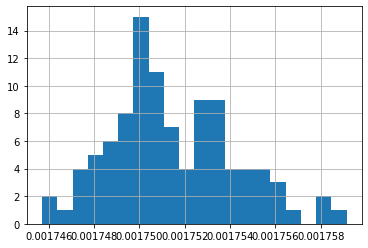

In [25]:
check = validation_df[validation_df.Term == 'sustainability']
check.difference.hist(bins=20)

### Visualize Difference

In [ ]:
diff = pd.read_csv('C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/diff_scores_original.csv')
diff_1 = pd.read_csv('C:/Users/ouren/Documents/School_Local/eHDV_Adoption/LDA_Processing/notebooks/diff_scores_with_mod_1.csv')

In [ ]:
diff.to_excel('diff_scores_original.xlsx')
diff_1.to_excel('diff_scores_with_mod_1.xlsx')

## Code in Development

In [ ]:
def add_normalized(df):
    total = df.score.sum()
    df['norm score'] = df.score / total

In [ ]:
add_normalized(scores_a)
add_normalized(scores_b)

### Saliency

In [ ]:
model_a_info = model_a.LDAvis_prepared.topic_info

### KL Divergence

In [ ]:
from gensim.matutils import kullback_leibler

In [ ]:
abm_topics = ['total_cost_of_ownership','purchase_price','infrastructure_cost','fuel_cost','resale_value','fuel_economy','range','payload_capacity',
            'reliability','suitability','power','price_stability','fuel_security','familiarity','driver_acceptance','brand_image','sustainability']

topics_bow_a = model_a.lda_model.id2word.doc2bow(abm_topics)
lda_bow_topics_a = model_a.lda_model[topics_bow_a]

topics_bow_b = model_b.lda_model.id2word.doc2bow(abm_topics)
lda_bow_topics_b = model_b.lda_model[topics_bow_b]

In [ ]:
for item in lda_bow_topics_a:
    print('\n',item)

In [ ]:
from scipy.stats import entropy

In [ ]:
for i in range(len(lda_bow_topics_a)):
    if type(lda_bow_topics_a[i]) != np.float32:
        for j in range(len(lda_bow_topics_a[i])):
            score_a = lda_bow_topics_a[i][j][1]
            score_b = lda_bow_topics_b[i][j][1]
            print(kullback_leibler(score_a,score_b))
    else:
        continue



In [ ]:
 print(kullback_leibler(lda_bow_topics_a,lda_bow_topics_b, num_features=6))

In [ ]:



print(kullback_leibler(lda_bow_topics_a,lda_bow_topics_b))

In [ ]:
type(lda_bow_topics_a[1][1][1][1])

In [ ]:
kl_div = model_a.lda_model.diff(model_b.lda_model)

### Saliency

In [ ]:
term_proportion = topic_info.Freq / topic_info.Freq.sum()

In [ ]:
def _topic_info(topic_term_dists, topic_proportion, term_frequency, term_topic_freq,
                vocab, lambda_step, R, n_jobs, start_index=1):
    # marginal distribution over terms (width of blue bars)
    term_proportion = term_frequency / term_frequency.sum()

    # compute the distinctiveness and saliency of the terms:
    # this determines the R terms that are displayed when no topic is selected.
    tt_sum = topic_term_dists.sum()
    topic_given_term = pd.eval("topic_term_dists / tt_sum")
    log_1 = np.log(pd.eval("topic_given_term.T / topic_proportion"))
    kernel = pd.eval("topic_given_term * log_1.T")
    distinctiveness = kernel.sum()
    saliency = term_proportion * distinctiveness
    # Order the terms for the "default" view by decreasing saliency:
    default_term_info = pd.DataFrame({
        'saliency': saliency,
        'Term': vocab,
        'Freq': term_frequency,
        'Total': term_frequency,
        'Category': 'Default'})
    default_term_info = default_term_info.sort_values(
        by='saliency', ascending=False).head(R).drop('saliency', 1)
    # Rounding Freq and Total to integer values to match LDAvis code:
    default_term_info['Freq'] = np.floor(default_term_info['Freq'])
    default_term_info['Total'] = np.floor(default_term_info['Total'])
    ranks = np.arange(R, 0, -1)
    default_term_info['logprob'] = default_term_info['loglift'] = ranks
    default_term_info = default_term_info.reindex(columns=[
        "Term", "Freq", "Total", "Category", "logprob", "loglift"
    ])

Sum words

In [ ]:
counts_df = top4_df.word.value_counts()#.rename_axis('word').reset_index('score')

In [ ]:
def get_sum(df):
    sums = {'word':[],'score':[]}
    words = df.word.unique()
    for word in words:
        tmp = df[df.word == word]
        score = tmp.score.sum()
        sums['word'].append(word)
        sums['score'].append(score)
    return pd.DataFrame(sums)

In [ ]:
sums = get_sum(top4_df)